In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [330]:
#konum değişiklik gösterir. Çalıştırırken kendinize uyarlamayı unutmayın. 
delhi_data = pd.read_csv('/Users/yarenuyaroglu/Desktop/DeusAI/datasets/Indian_housing/Indian_housing_Delhi_data.csv')
mumbai_data = pd.read_csv('/Users/yarenuyaroglu/Desktop/DeusAI/datasets/Indian_housing/Indian_housing_Mumbai_data.csv')
pune_data = pd.read_csv('/Users/yarenuyaroglu/Desktop/DeusAI/datasets/Indian_housing/Indian_housing_Pune_data.csv')

df = pd.concat([delhi_data, mumbai_data, pune_data], ignore_index=True)

In [332]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [334]:
df.shape

(13910, 16)

Null değer kontrolü

In [337]:
df.isnull().sum()

house_type              0
house_size              0
location                0
city                    0
latitude                0
longitude               0
price                   0
currency                0
numBathrooms           56
numBalconies         8619
isNegotiable        12634
priceSqFt           13910
verificationDate        0
description           831
SecurityDeposit         0
Status                  0
dtype: int64

In [339]:
# priceSqFt sütununu kaldır
df.drop(columns=['priceSqFt'], inplace=True)

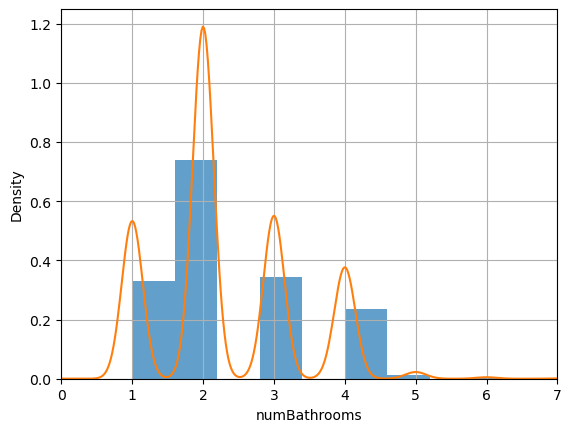

In [341]:
ax = df["numBathrooms"].hist(bins=15, density=True, stacked=True, alpha=0.7)
df["numBathrooms"].plot(kind="density")
ax.set(xlabel= "numBathrooms")
plt.xlim(0,7)
plt.grid()
plt.show() #null değerleri mode ile doldurmak mantıklı görünüyor.

In [343]:
# Median ile eksik değerleri doldur
df['numBathrooms'].fillna(df['numBathrooms'].median(), inplace=True)

In [345]:
missing_percentage = (df['numBalconies'].isnull().sum() / len(df)) * 100
print(f"Missing values percentage: {missing_percentage:.2f}%")

Missing values percentage: 61.96%


In [347]:
# Mean ile eksik değerleri doldur
df['numBalconies'].fillna(df['numBalconies'].mean(), inplace=True)

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_7427/4281763199.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





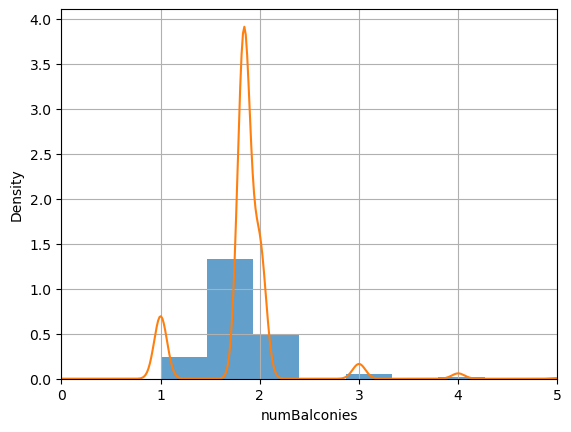

In [349]:
ax = df["numBalconies"].hist(bins=15, density=True, stacked=True, alpha=0.7)
df["numBalconies"].plot(kind="density")
ax.set(xlabel= "numBalconies")
plt.xlim(0,5)
plt.grid()
plt.show()

In [351]:
#!!Kategorik bir veri
missing_percentage = (df['isNegotiable'].isnull().sum() / len(df)) * 100
print(f"Missing values percentage: {missing_percentage:.2f}%")

Missing values percentage: 90.83%


In [353]:
# isNegotiable sütununu kaldırmak mantıklı 
df.drop(columns=['isNegotiable'], inplace=True)

In [355]:
# description sütununu kaldır
df.drop(columns=['description'], inplace=True)

In [357]:
df.isnull().sum()

house_type          0
house_size          0
location            0
city                0
latitude            0
longitude           0
price               0
currency            0
numBathrooms        0
numBalconies        0
verificationDate    0
SecurityDeposit     0
Status              0
dtype: int64

In [359]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,1.840484,Posted a day ago,No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,1.840484,Posted 9 days ago,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,1.840484,Posted 12 days ago,No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,1.840484,Posted a year ago,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,1.840484,Posted a year ago,No Deposit,Unfurnished


(-1.0999985731372204,
 1.099999873316752,
 -1.099997836081478,
 1.0999995699439389)

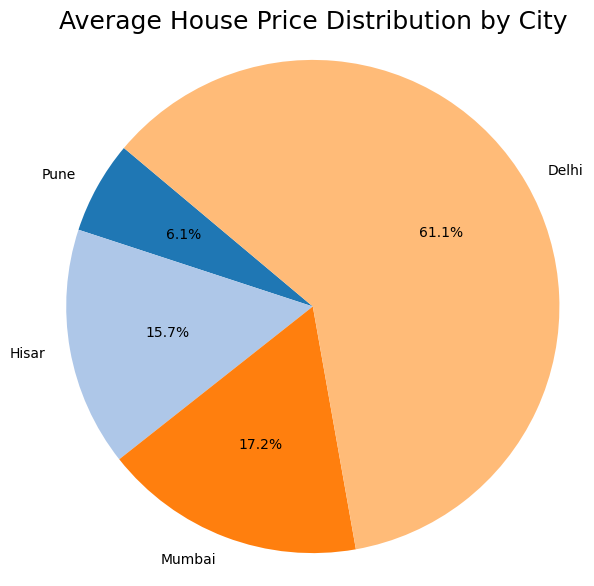

In [366]:
average_prices_by_city = df.groupby('city')['price'].mean().sort_values()
city_names = average_prices_by_city.index
average_prices = average_prices_by_city.values

plt.figure(figsize=(7, 7))
plt.pie(average_prices, labels=city_names, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)
plt.title('Average House Price Distribution by City', fontsize=18)
plt.axis('equal')  # Grafik dairesel olacak şekilde ayarla


Categorical to Numerical

In [270]:
# Kategorik özellikleri seçme
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Kategorik özellikleri sayısal verilere dönüştürme
for feature in cat_features:
    # Her kategori için fiyat ortalamasını hesapla ve sıralı liste oluştur
    mean_prices = df.groupby(feature)['price'].mean().sort_values()
    
    # Kategorilere sıralı sayısal değerler atama
    label_ordered = {label: idx for idx, label in enumerate(mean_prices.index)}
    
    # Kategorik verileri sayısal verilere dönüştürme
    df[feature] = df[feature].map(label_ordered)

In [272]:
def extract_numeric(size_str):
    # Veriyi string'e dönüştür
    size_str = str(size_str)
    # Virgül varsa temizle
    size_str = size_str.replace(',', '')
    # Sadece sayısal kısmı döndür
    return float(size_str.split()[0])

# `house_size` sütununu sayısal değere dönüştür
df['house_size_numeric'] = df['house_size'].apply(extract_numeric)

# Orijinal `house_size` sütununu kaldır
df.drop(columns=['house_size'], inplace=True)


In [274]:
df.head()

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status,house_size_numeric
0,2,537,3,28.545561,77.254349,22000,0,1.0,1.840484,40,133,1,135.0
1,2,524,3,28.643259,77.132828,20000,0,1.0,1.840484,42,133,1,135.0
2,6,176,3,28.618677,77.053352,8500,0,1.0,1.840484,48,133,0,344.0
3,10,314,3,28.712898,77.180000,48000,0,3.0,1.840484,57,133,1,665.0
4,8,344,3,28.723539,77.131424,20000,0,2.0,1.840484,57,133,2,410.0


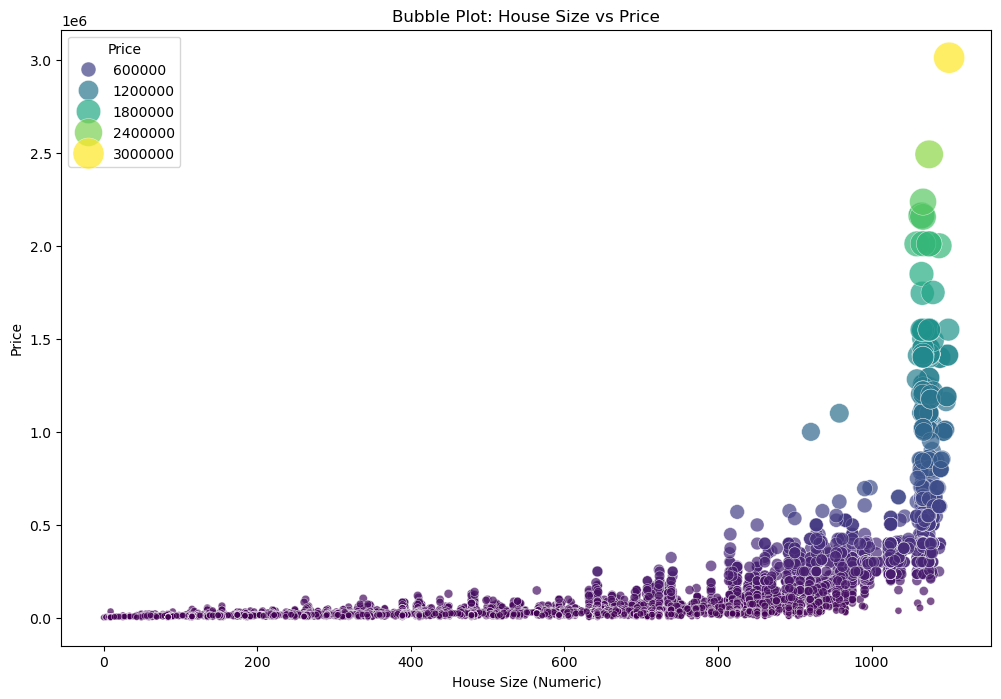

In [320]:
plt.figure(figsize=(12, 8))
# Baloncuk grafiği
sbn.scatterplot(data=df, x='house_size_numeric', y='price', size='price', sizes=(20, 500), alpha=0.7, hue='price', palette='viridis')

plt.title('Bubble Plot: House Size vs Price')
plt.xlabel('House Size (Numeric)')
plt.ylabel('Price')
plt.legend(title='Price')
plt.show()


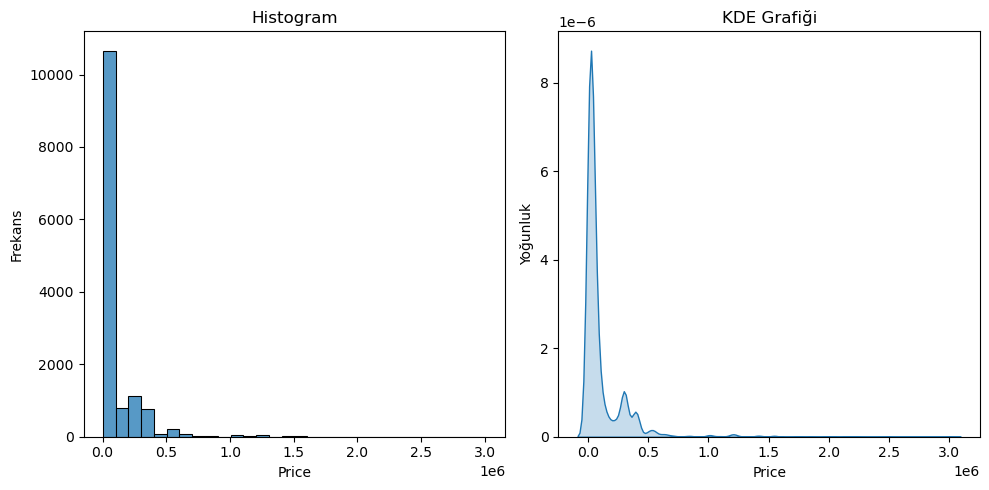

In [208]:
price_data = df['price']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sbn.histplot(price_data, kde=False, bins=30)
plt.title('Histogram')
plt.xlabel('Price')
plt.ylabel('Frekans')

# KDE (Kernel Density Estimate) grafiğini çizme
plt.subplot(1, 2, 2)
sbn.kdeplot(price_data, fill=True)
plt.title('KDE Grafiği')
plt.xlabel('Price')
plt.ylabel('Yoğunluk')

plt.tight_layout()
plt.show()

In [210]:
#veriler sola çarpık(left skewed)  bunu dengelemek için 
df['price'] = np.log(df['price'])
#Normalizasyon gibi bir işlevi vardır

In [212]:
df.head()

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status,house_size_numeric
0,2,537,3,28.545561,77.254349,9.998798,0,1.0,1.840484,40,133,1,135.0
1,2,524,3,28.643259,77.132828,9.903488,0,1.0,1.840484,42,133,1,135.0
2,6,176,3,28.618677,77.053352,9.047821,0,1.0,1.840484,48,133,0,344.0
3,10,314,3,28.712898,77.180000,10.778956,0,3.0,1.840484,57,133,1,665.0
4,8,344,3,28.723539,77.131424,9.903488,0,2.0,1.840484,57,133,2,410.0


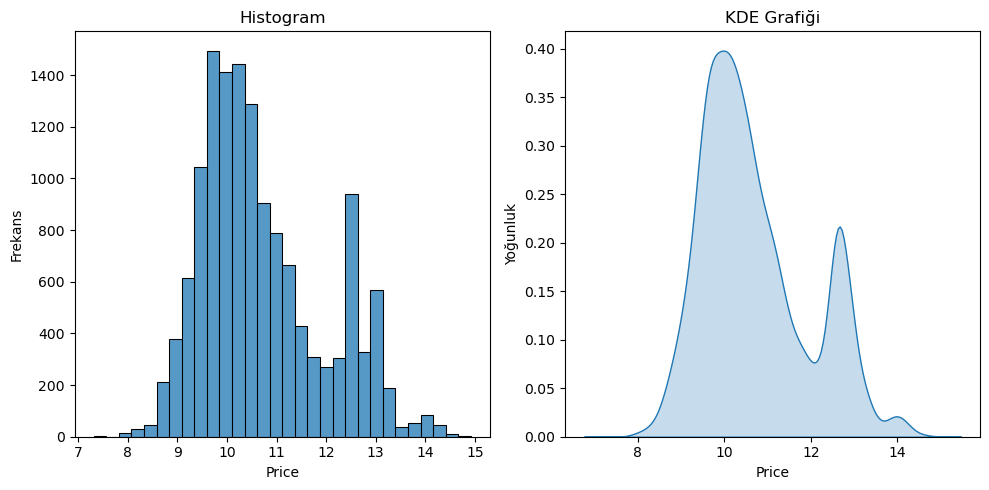

In [214]:
price_data = df['price']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sbn.histplot(price_data, kde=False, bins=30)
plt.title('Histogram')
plt.xlabel('Price')
plt.ylabel('Frekans')

# KDE (Kernel Density Estimate) grafiğini çizme
plt.subplot(1, 2, 2)
sbn.kdeplot(price_data, fill=True)
plt.title('KDE Grafiği')
plt.xlabel('Price')
plt.ylabel('Yoğunluk')

plt.tight_layout()
plt.show()

In [217]:
from sklearn.preprocessing import StandardScaler
feature_scale = [feature for feature in df.columns if feature != 'price']

scaler = StandardScaler()
scaler.fit(df[feature_scale])

df = pd.concat([df['price'].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]), columns = feature_scale)],axis=1)
df.head()

,price,house_type,location,city,latitude,longitude,currency,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status,house_size_numeric
0,9.998798,-1.399219,0.512373,1.00169,1.322915,1.166203,0.0,-1.324893,-1.023377e-15,-0.360437,-0.207565,-0.005217,-1.769981
1,9.903488,-1.399219,0.438744,1.00169,1.343880,1.110494,0.0,-1.324893,-1.023377e-15,-0.216471,-0.207565,-0.005217,-1.769981
2,9.047821,-0.654589,-1.532255,1.00169,1.338605,1.074060,0.0,-1.324893,-1.023377e-15,0.215426,-0.207565,-1.121612,-1.043544
3,10.778956,0.090041,-0.750652,1.00169,1.358824,1.132120,0.0,0.674267,-1.023377e-15,0.863273,-0.207565,-0.005217,0.072180
4,9.903488,-0.282274,-0.580738,1.00169,1.361107,1.109851,0.0,-0.325313,-1.023377e-15,0.863273,-0.207565,1.111178,-0.814143


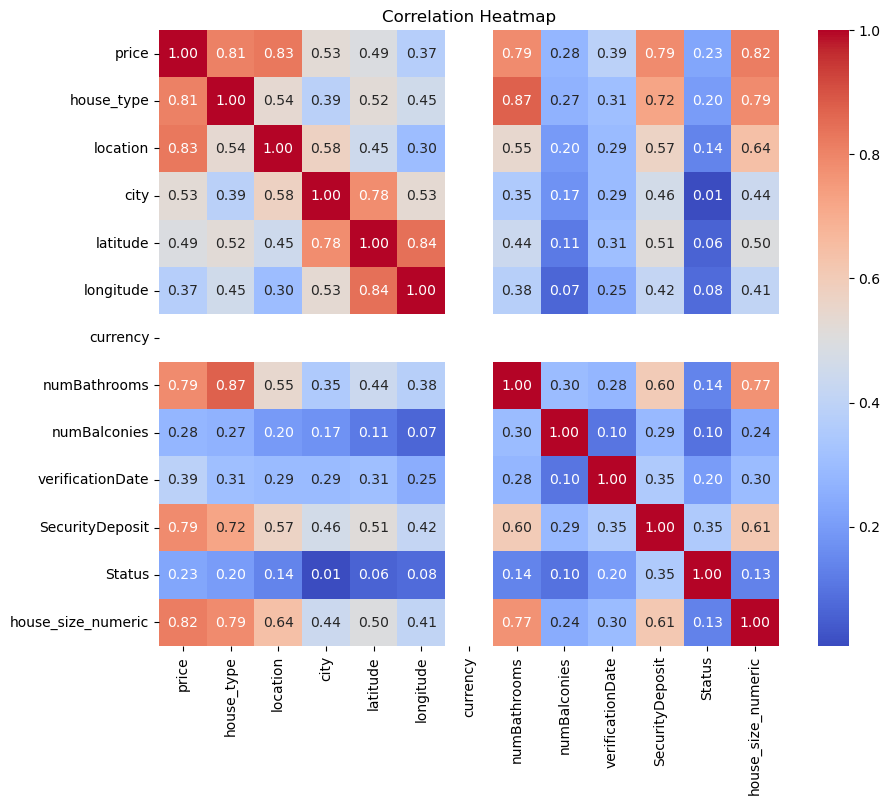

In [219]:
plt.figure(figsize=(10, 8))
sbn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [221]:
currency_column = df['currency']  # 'currency' sütununu seçin
# Tüm değerlerin "INC" olup olmadığını kontrol etme
all_inc = (currency_column == 0).all()

if all_inc:
    print("Tüm 'currency' değerleri 0")

Tüm 'currency' değerleri 0.


In [223]:
df.drop(columns=['currency'], inplace=True)

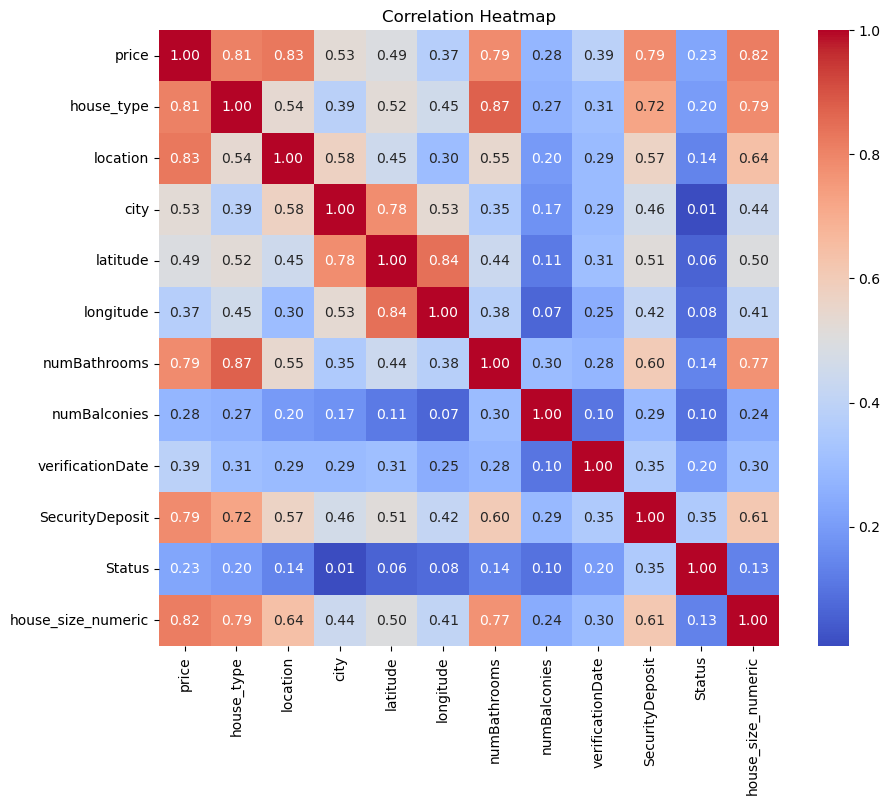

In [225]:
plt.figure(figsize=(10, 8))
sbn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [227]:
df.head()

,price,house_type,location,city,latitude,longitude,numBathrooms,numBalconies,verificationDate,SecurityDeposit,Status,house_size_numeric
0,9.998798,-1.399219,0.512373,1.00169,1.322915,1.166203,-1.324893,-1.023377e-15,-0.360437,-0.207565,-0.005217,-1.769981
1,9.903488,-1.399219,0.438744,1.00169,1.343880,1.110494,-1.324893,-1.023377e-15,-0.216471,-0.207565,-0.005217,-1.769981
2,9.047821,-0.654589,-1.532255,1.00169,1.338605,1.074060,-1.324893,-1.023377e-15,0.215426,-0.207565,-1.121612,-1.043544
3,10.778956,0.090041,-0.750652,1.00169,1.358824,1.132120,0.674267,-1.023377e-15,0.863273,-0.207565,-0.005217,0.072180
4,9.903488,-0.282274,-0.580738,1.00169,1.361107,1.109851,-0.325313,-1.023377e-15,0.863273,-0.207565,1.111178,-0.814143
